In [15]:
#IMPORTS
import tensorflow as tf
import numpy as np
import pathlib
import datetime
import scipy
import matplotlib.pyplot as plt

In [24]:
#DATA LOADING
dirs = ["100","150","200","250","300"]
history = []
for s in dirs:    
    data_dir = pathlib.Path("./{}".format(s))
    image_count = len(list(data_dir.glob('*/*.jpg')))
    print("Total Num Images = {}".format(image_count))
    CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt" ])
    output_class_units = len(CLASS_NAMES)
    print(CLASS_NAMES)
    
    #IMPLEMENTATION OF ALEXNET ARCHITECTURE FROM https://www.kaggle.com/code/vortexkol/alexnet-cnn-architecture-on-tensorflow-beginner/notebook
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
      tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(4096, activation='relu'),
      tf.keras.layers.Dense(4096, activation='relu'),
      tf.keras.layers.Dense(output_class_units, activation='softmax')
    ])

    # Shape of inputs to NN Model
    BATCH_SIZE = 2             # Can be of size 2^n, but not restricted to. for the better utilization of memory
    IMG_HEIGHT = 227            # input Shape required by the model
    IMG_WIDTH = 227             # input Shape required by the model
    STEPS_PER_EPOCH = 5 #np.ceil(image_count/BATCH_SIZE)
    
    #DATA PREPROCESSING FROM https://www.kaggle.com/code/vortexkol/alexnet-cnn-architecture-on-tensorflow-beginner/notebook
    image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                         batch_size=BATCH_SIZE,
                                                         shuffle=True,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                                         classes = list(CLASS_NAMES))
    model.compile(optimizer='sgd', loss="categorical_crossentropy", metrics=['accuracy', 'mean_squared_error'])
    #model.summary()
    
    #TRAIN MODEL
    history.append(model.fit(
              train_data_gen,
              steps_per_epoch=STEPS_PER_EPOCH,
              epochs=100))

    print("\n---------------------------------------------------------------------------------------------------\n")

Total Num Images = 100
['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust']
Found 100 images belonging to 3 classes.
Epoch 1/100
5/5 [==============================] - 5s 930ms/step - loss: 13.7232 - accuracy: 0.3000 - mean_squared_error: 0.3801
Epoch 2/100
5/5 [==============================] - 4s 902ms/step - loss: 18.6765 - accuracy: 0.2000 - mean_squared_error: 0.5331
Epoch 3/100
5/5 [==============================] - 4s 868ms/step - loss: 10.0227 - accuracy: 0.5000 - mean_squared_error: 0.3152
Epoch 4/100
5/5 [==============================] - 4s 890ms/step - loss: 5.7138 - accuracy: 0.6000 - mean_squared_error: 0.2463
Epoch 5/100
5/5 [==============================] - 4s 897ms/step - loss: 7.9462 - accuracy: 0.4000 - mean_squared_error: 0.3923
Epoch 6/100
5/5 [==============================] - 5s 924ms/step - loss: 1.0702 - accuracy: 0.6000 - mean_squared_error: 0.1975
Epoch 7/100
5/5 [==============================] - 5s 904ms/step - loss: 4.3340 - accuracy: 0.6

5/5 [==============================] - 5s 899ms/step - loss: 0.1458 - accuracy: 0.9000 - mean_squared_error: 0.0280
Epoch 64/100
5/5 [==============================] - 5s 937ms/step - loss: 0.0485 - accuracy: 1.0000 - mean_squared_error: 0.0095
Epoch 65/100
5/5 [==============================] - 5s 931ms/step - loss: 0.2124 - accuracy: 0.9000 - mean_squared_error: 0.0468
Epoch 66/100
5/5 [==============================] - 4s 895ms/step - loss: 0.4346 - accuracy: 0.8000 - mean_squared_error: 0.0825
Epoch 67/100
5/5 [==============================] - 5s 944ms/step - loss: 0.3354 - accuracy: 0.8000 - mean_squared_error: 0.0753
Epoch 68/100
5/5 [==============================] - 4s 864ms/step - loss: 0.1223 - accuracy: 0.9000 - mean_squared_error: 0.0251
Epoch 69/100
5/5 [==============================] - 5s 907ms/step - loss: 0.0109 - accuracy: 1.0000 - mean_squared_error: 5.1719e-04
Epoch 70/100
5/5 [==============================] - 5s 910ms/step - loss: 0.0166 - accuracy: 1.0000 - mean

5/5 [==============================] - 5s 971ms/step - loss: 0.9540 - accuracy: 0.6000 - mean_squared_error: 0.1960
Epoch 25/100
5/5 [==============================] - 5s 974ms/step - loss: 0.6621 - accuracy: 0.7000 - mean_squared_error: 0.1310
Epoch 26/100
5/5 [==============================] - 5s 1s/step - loss: 1.3020 - accuracy: 0.5000 - mean_squared_error: 0.2556
Epoch 27/100
5/5 [==============================] - 5s 970ms/step - loss: 0.3634 - accuracy: 0.9000 - mean_squared_error: 0.0694
Epoch 28/100
5/5 [==============================] - 5s 950ms/step - loss: 0.4053 - accuracy: 0.8000 - mean_squared_error: 0.0838
Epoch 29/100
5/5 [==============================] - 5s 923ms/step - loss: 1.4254 - accuracy: 0.6000 - mean_squared_error: 0.2308
Epoch 30/100
5/5 [==============================] - 5s 929ms/step - loss: 0.1475 - accuracy: 1.0000 - mean_squared_error: 0.0198
Epoch 31/100
5/5 [==============================] - 4s 859ms/step - loss: 0.5202 - accuracy: 0.7000 - mean_square

5/5 [==============================] - 4s 907ms/step - loss: 0.3570 - accuracy: 0.9000 - mean_squared_error: 0.0669
Epoch 88/100
5/5 [==============================] - 4s 831ms/step - loss: 0.3838 - accuracy: 0.8000 - mean_squared_error: 0.0939
Epoch 89/100
5/5 [==============================] - 4s 805ms/step - loss: 1.2080 - accuracy: 0.8000 - mean_squared_error: 0.1062
Epoch 90/100
5/5 [==============================] - 4s 773ms/step - loss: 0.2199 - accuracy: 0.9000 - mean_squared_error: 0.0476
Epoch 91/100
5/5 [==============================] - 5s 936ms/step - loss: 0.0714 - accuracy: 1.0000 - mean_squared_error: 0.0103
Epoch 92/100
5/5 [==============================] - 4s 784ms/step - loss: 0.0958 - accuracy: 0.9000 - mean_squared_error: 0.0225
Epoch 93/100
5/5 [==============================] - 4s 831ms/step - loss: 0.1519 - accuracy: 0.9000 - mean_squared_error: 0.0299
Epoch 94/100
5/5 [==============================] - 4s 813ms/step - loss: 1.1135 - accuracy: 0.8000 - mean_squ

5/5 [==============================] - 4s 823ms/step - loss: 0.6859 - accuracy: 0.7000 - mean_squared_error: 0.1244
Epoch 49/100
5/5 [==============================] - 4s 815ms/step - loss: 0.2447 - accuracy: 0.9000 - mean_squared_error: 0.0532
Epoch 50/100
5/5 [==============================] - 4s 818ms/step - loss: 1.7779 - accuracy: 0.6000 - mean_squared_error: 0.2149
Epoch 51/100
5/5 [==============================] - 4s 826ms/step - loss: 1.7081 - accuracy: 0.7000 - mean_squared_error: 0.1783
Epoch 52/100
5/5 [==============================] - 4s 832ms/step - loss: 0.8851 - accuracy: 0.7000 - mean_squared_error: 0.1557
Epoch 53/100
5/5 [==============================] - 4s 895ms/step - loss: 0.9958 - accuracy: 0.6000 - mean_squared_error: 0.1980
Epoch 54/100
5/5 [==============================] - 4s 873ms/step - loss: 0.8092 - accuracy: 0.7000 - mean_squared_error: 0.1384
Epoch 55/100
5/5 [==============================] - 5s 946ms/step - loss: 0.3455 - accuracy: 0.9000 - mean_squ

5/5 [==============================] - 5s 984ms/step - loss: 5.3348 - accuracy: 0.5000 - mean_squared_error: 0.3274
Epoch 10/100
5/5 [==============================] - 4s 843ms/step - loss: 10.1153 - accuracy: 0.3000 - mean_squared_error: 0.4350
Epoch 11/100
5/5 [==============================] - 4s 808ms/step - loss: 5.3509 - accuracy: 0.5000 - mean_squared_error: 0.3017
Epoch 12/100
5/5 [==============================] - 4s 851ms/step - loss: 3.6264 - accuracy: 0.2000 - mean_squared_error: 0.4142
Epoch 13/100
5/5 [==============================] - 4s 865ms/step - loss: 2.2905 - accuracy: 0.6000 - mean_squared_error: 0.2376
Epoch 14/100
5/5 [==============================] - 4s 801ms/step - loss: 1.9169 - accuracy: 0.5000 - mean_squared_error: 0.2877
Epoch 15/100
5/5 [==============================] - 4s 836ms/step - loss: 1.5426 - accuracy: 0.6000 - mean_squared_error: 0.1624
Epoch 16/100
5/5 [==============================] - 4s 804ms/step - loss: 3.1491 - accuracy: 0.3000 - mean_sq

5/5 [==============================] - 4s 771ms/step - loss: 0.7449 - accuracy: 0.6000 - mean_squared_error: 0.1573
Epoch 73/100
5/5 [==============================] - 4s 800ms/step - loss: 0.2530 - accuracy: 0.8000 - mean_squared_error: 0.0520
Epoch 74/100
5/5 [==============================] - 4s 819ms/step - loss: 0.1026 - accuracy: 1.0000 - mean_squared_error: 0.0111
Epoch 75/100
5/5 [==============================] - 4s 808ms/step - loss: 0.5124 - accuracy: 0.9000 - mean_squared_error: 0.0661
Epoch 76/100
5/5 [==============================] - 4s 823ms/step - loss: 0.9093 - accuracy: 0.6000 - mean_squared_error: 0.1800
Epoch 77/100
5/5 [==============================] - 4s 804ms/step - loss: 0.9352 - accuracy: 0.6000 - mean_squared_error: 0.1809
Epoch 78/100
5/5 [==============================] - 4s 811ms/step - loss: 0.8565 - accuracy: 0.5000 - mean_squared_error: 0.1775
Epoch 79/100
5/5 [==============================] - 4s 801ms/step - loss: 0.9503 - accuracy: 0.6000 - mean_squ

5/5 [==============================] - 4s 850ms/step - loss: 0.7738 - accuracy: 0.8000 - mean_squared_error: 0.1475
Epoch 34/100
5/5 [==============================] - 4s 885ms/step - loss: 0.5219 - accuracy: 0.7000 - mean_squared_error: 0.1074
Epoch 35/100
5/5 [==============================] - 4s 844ms/step - loss: 0.6773 - accuracy: 0.8000 - mean_squared_error: 0.1280
Epoch 36/100
5/5 [==============================] - 4s 836ms/step - loss: 0.5416 - accuracy: 0.8000 - mean_squared_error: 0.1040
Epoch 37/100
5/5 [==============================] - 4s 833ms/step - loss: 0.9763 - accuracy: 0.6000 - mean_squared_error: 0.1946
Epoch 38/100
5/5 [==============================] - 4s 833ms/step - loss: 1.2553 - accuracy: 0.5000 - mean_squared_error: 0.2606
Epoch 39/100
5/5 [==============================] - 4s 845ms/step - loss: 0.6829 - accuracy: 0.7000 - mean_squared_error: 0.1388
Epoch 40/100
5/5 [==============================] - 4s 835ms/step - loss: 0.7163 - accuracy: 0.6000 - mean_squ

5/5 [==============================] - 4s 803ms/step - loss: 0.3378 - accuracy: 0.8000 - mean_squared_error: 0.0720
Epoch 97/100
5/5 [==============================] - 4s 842ms/step - loss: 0.1327 - accuracy: 0.9000 - mean_squared_error: 0.0322
Epoch 98/100
5/5 [==============================] - 4s 859ms/step - loss: 1.1630 - accuracy: 0.8000 - mean_squared_error: 0.1433
Epoch 99/100
5/5 [==============================] - 4s 852ms/step - loss: 0.0819 - accuracy: 1.0000 - mean_squared_error: 0.0107
Epoch 100/100
5/5 [==============================] - 4s 827ms/step - loss: 0.7913 - accuracy: 0.7000 - mean_squared_error: 0.1793

---------------------------------------------------------------------------------------------------



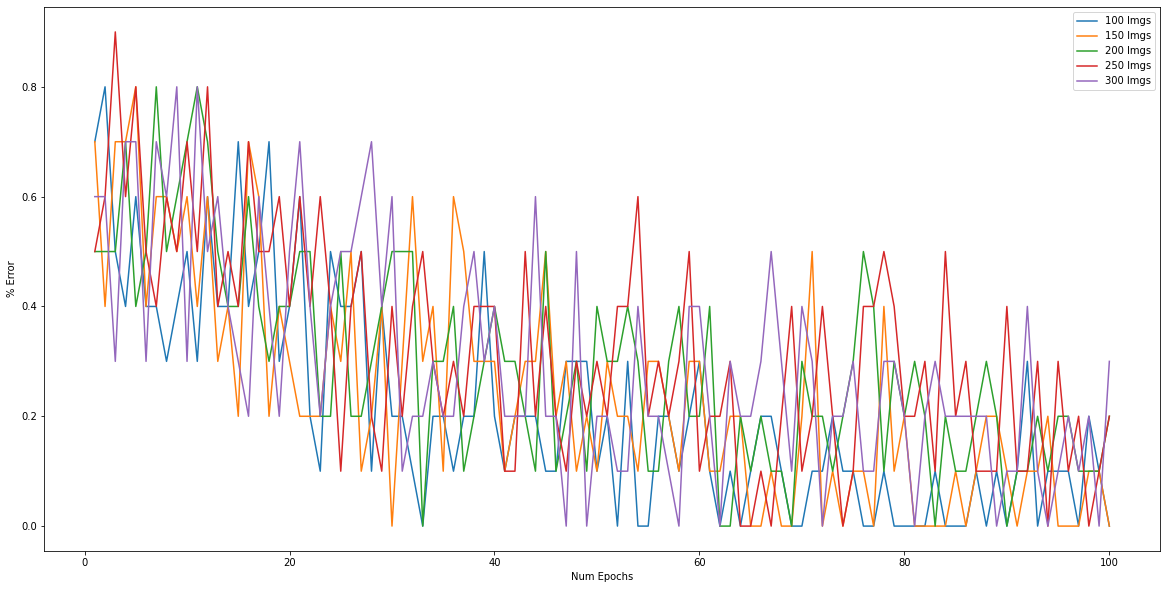

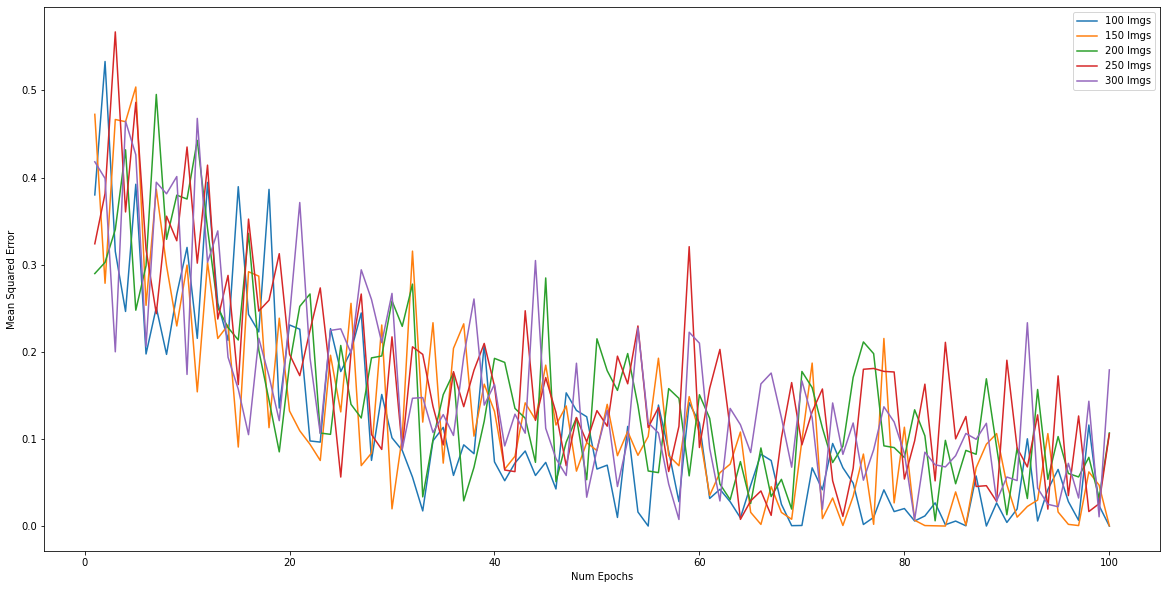

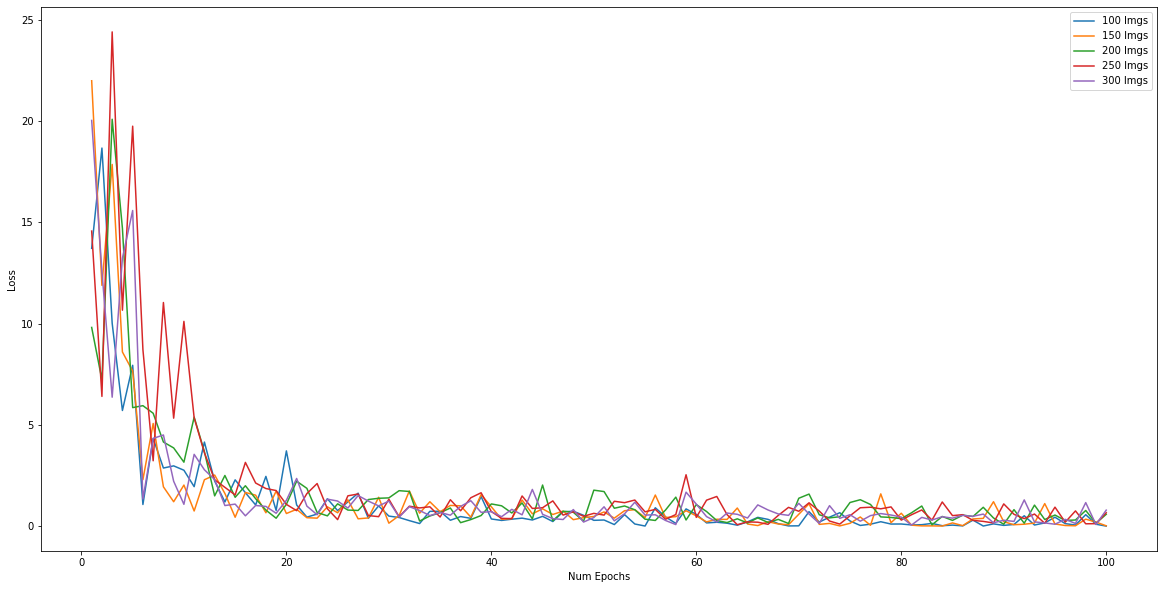

In [33]:
#GRAPH HISTORY
plt.rcParams['figure.figsize'] = '20,10'
for idx in range(5):
    acc = np.asarray(history[idx].history['accuracy'])
    error = 1 - acc
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, error, label="{} Imgs".format(100+50*idx))
plt.xlabel("Num Epochs")
plt.ylabel("% Error")
plt.legend()
plt.show()

for idx in range(5):
    mse = np.asarray(history[idx].history['mean_squared_error'])
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, mse, label="{} Imgs".format(100+50*idx))
plt.xlabel("Num Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

for idx in range(5):
    mse = np.asarray(history[idx].history['loss'])
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, mse, label="{} Imgs".format(100+50*idx))
plt.xlabel("Num Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()